In [4]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter,convolve
import matplotlib.pyplot as plt
from numpy import where
import cv2

/var/folders/ll/fpk1qrzs67b44y0k3tqb_bv00000gn/T/ipykernel_74467/1489230158.py:2: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter,convolve
/var/folders/ll/fpk1qrzs67b44y0k3tqb_bv00000gn/T/ipykernel_74467/1489230158.py:2: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter,convolve


In [5]:
DPI = 120

### load the image

In [20]:
# Load the historical map image
image = cv2.imread('data/Siegfried.tif', cv2.IMREAD_COLOR)

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into R, G, B channels
R, G, B = cv2.split(image_rgb)

Text(0.5, 1.0, 'Input image')

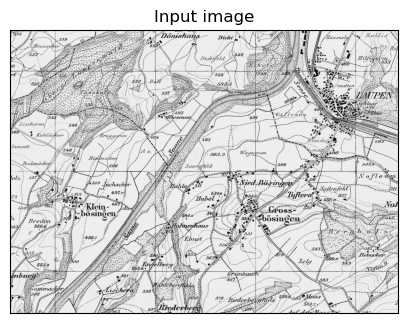

In [7]:
input_img=cv2.imread('data/Siegfried.tif', 0).astype('float')
plt.figure(figsize=(5, 5))
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

### Gaussian blur the image

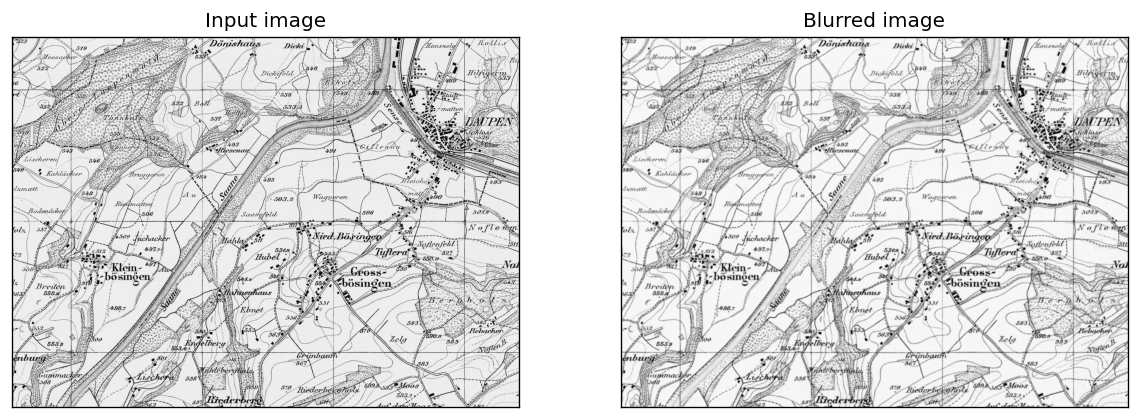

In [32]:
## TODO
blurred_img = gaussian_filter(B,sigma=2)

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

a = plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(blurred_img, cmap=plt.cm.gray)
plt.title('Blurred image')
plt.show()

In [33]:
# save fig
a.figure.savefig("blurred.png",bbox_inches='tight') 

### Use Sobel filter to compute gradient along x and y

In [34]:
## TODO
sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]), np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
I_x = convolve(blurred_img,sobel_kernel[0])
I_y = convolve(blurred_img,sobel_kernel[1])

### Compute gradient magnitude and direction

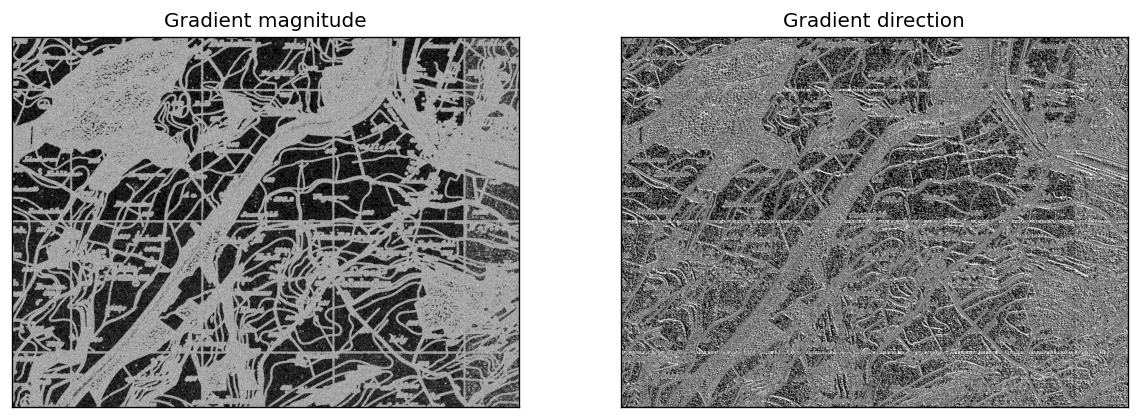

In [35]:
## TODO
magnitude = np.sqrt(np.square(I_x)+np.square(I_y))
direction = np.arctan2(I_y, I_x)

b = plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(magnitude, cmap = 'gray')
plt.title('Gradient magnitude')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(direction, cmap=plt.cm.gray)
plt.title('Gradient direction')
plt.show()

In [36]:
# save fig
b.figure.savefig("gradient_magnitude.png",bbox_inches='tight') 

### Threshold the edges

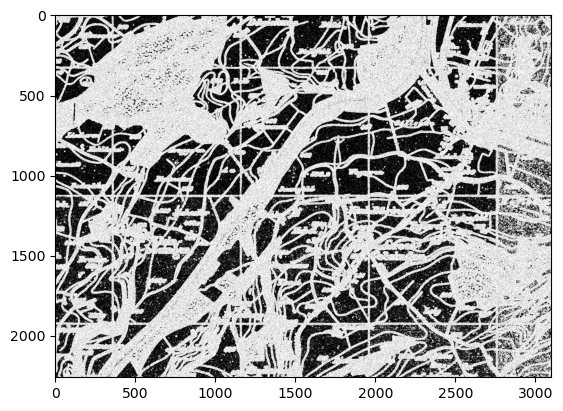

In [37]:
thresh = np.quantile(magnitude,0.4)
thresholdEdges = (magnitude > thresh)*1 #warum???
plt.imshow(thresholdEdges,cmap='gray')

### Apply NMS

In [38]:
# Code GeeksForGeeks (https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/)
def NMS(img, direction,size=3):
    
    # possible "kernel" sizes: 3 or 5
    
    height, width = img.shape

    for i_x in range(width):
        for i_y in range(height):

            grad_ang = direction[i_y, i_x] * 180. / np.pi
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
                neighb_3_x, neighb_3_y = i_x-2, i_y
                neighb_4_x, neighb_4_y = i_x + 2, i_y

            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
                neighb_3_x, neighb_3_y = i_x-2, i_y-2
                neighb_4_x, neighb_4_y = i_x + 2, i_y + 2

            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
                neighb_3_x, neighb_3_y = i_x, i_y-2
                neighb_4_x, neighb_4_y = i_x, i_y + 2

            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
                neighb_3_x, neighb_3_y = i_x-2, i_y + 2
                neighb_4_x, neighb_4_y = i_x + 2, i_y-2

            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
                neighb_3_x, neighb_3_y = i_x-2, i_y
                neighb_4_x, neighb_4_y = i_x + 2, i_y


            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if img[i_y, i_x]<img[neighb_1_y, neighb_1_x]:
                    img[i_y, i_x]= 0
                    continue
                    
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if img[i_y, i_x]<img[neighb_2_y, neighb_2_x]:
                    img[i_y, i_x]= 0
                    continue

            if size == 5:
                if width>neighb_3_x>= 0 and height>neighb_3_y>= 0:
                    if img[i_y, i_x]<img[neighb_3_y, neighb_3_x]:
                        img[i_y, i_x]= 0
                        continue

                if width>neighb_4_x>= 0 and height>neighb_4_y>= 0:
                    if img[i_y, i_x]<img[neighb_4_y, neighb_4_x]:
                        img[i_y, i_x]= 0

    
    return img

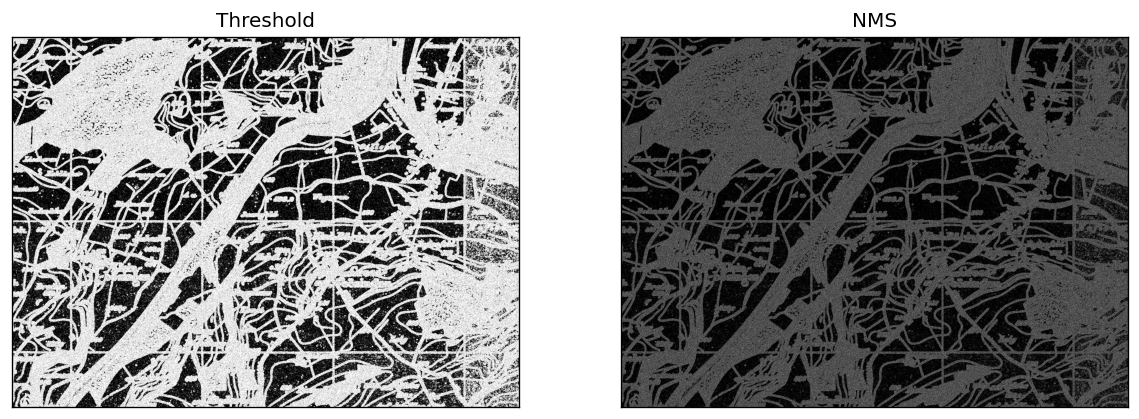

In [39]:
## TODO
edges = NMS(magnitude*thresholdEdges,direction,size=3)

b = plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(thresholdEdges, cmap = 'gray')
plt.title('Threshold')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(edges, cmap=plt.cm.gray)
plt.title('NMS')
plt.show()

In [40]:
# save fig
b.figure.savefig("thresh_nms.png",bbox_inches='tight') 

### Visualise the Canny edges

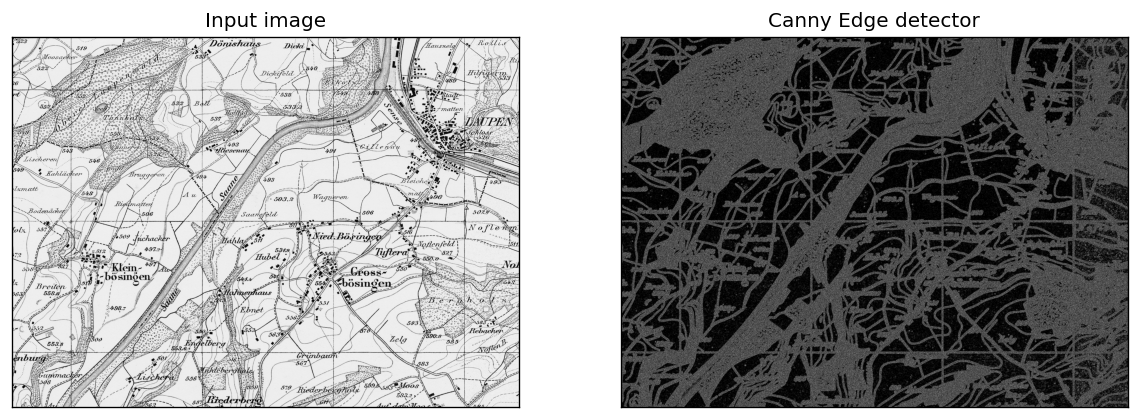

In [41]:
plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(edges, cmap=plt.cm.gray)
plt.title('Canny Edge detector')
plt.show()